<a href="https://colab.research.google.com/github/Steve-YJ/Assignment_Standalone_DL/blob/master/Ch05_1)_DFS_BFS_%EC%9D%B4%EB%A1%A0_%EB%B0%8F_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 탐색 알고리즘 DFS/BFS
* <code>스택과 큐</code>, <code>재귀 함수</code>는 DFS와 BFS에서 가장 중요한 개념이라 앞서 간단하게 다뤄보았다
* 지금부터는 탐색 알고리즘 DFS와 BFS에 대해 살펴보도록 한다

## 1. DFS

*  DFS는 Depth=First Search, 깊이 우선탐색이라고 부르며, 그래프에서 깊은 부분을 우선적으로 탐색하는 알고리즘이다
* DFS를 설명하기 전에 먼저 `그래프(Graph)의 기본 구조`를 알아야한다
    * ✅ 그래프의 기본 구조
        * 그래프는 노드(Node)와 간선(Edge)로 표현되며 이 때 노드를 정점(Vertax)라고도 말한다. (Node == Vertax)
    * 그래프 탐색이란 하나의 노드를 시작으로 다수의 노드를 방문하는 것을 말한다
    * 또한 두 도느가 간선(Edge)으로 연결되어 있다면 '두 노드는 인접하다(Adjacent)'라고 표현한다



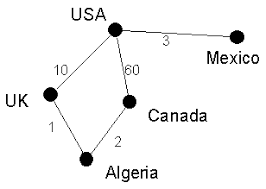

위의 그림을 통해 노드와 엣지를 직관적으로 이해해보자<br>
Node는 각 도시를 Edge는 각 도시를 연결하는 다리라고 할 수 있

* 프로그래밍에서 그래프(Graph)는 크게 2가지 방식으로 표현할 수 있는데 코딩 테스트에서는 이 두 방식 모두 필요하니 두 개념에 대해 바르게 알고 있도록 하자
    * 인접 행렬(Adjacency Matrix): 2차원 배열로 그래프의 연결 관계를 표현하는 방식
    * 인접 리스트(Adjacency List): 리스트로 그래프의 연결 관계를 표현하는 방식 

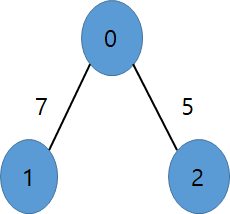

### 인접 행렬(Adjacency Matrix) 방식
* 인접 행렬 방식은 2차원 배열에 각 노드가 연결된 형태를 기록하는 방식이다
* 위와 같이 연결된 그래프를 인접 행렬로 표현할 때 파이썬에서는 2차원 리스트로 구현할 수 있다
* 연결이 되어 있지 않은 노드끼리는 무한(infinity)의 비용이라고 작성한다.(실제 코드에서는 논리적으로 정답이 될 수 없는 큰 값 중에서 999999999, 987654321 등의 값으로 초기화하는 경우가 많다)
* 다음의 예제를 통해 초기화를 해보

In [1]:
# 5-6.py 인접 행렬 방식 예제

INF = 999999999  # 무한의 비용 선언

# 2차원 리스트를 이용해 인접 행렬 표현
graph = [
         [0, 7, 5],
         [7, 0, INF],
         [5, INF, 0]
]

print(graph)

[[0, 7, 5], [7, 0, 999999999], [5, 999999999, 0]]


*그렇다면 인접 리스트(Adjacency List) 방식에서는 데이터를 어떤 방식으로 저장할까?*<br>

인접 리스트 방식에서는 모든 노드에 연결된 노드에 대한 정보를 차례대로 연결하여 저장한다.

### 인접 리스트(Adjacency List) 방식
* 인접 리스트 방식에서는 모든 노드에 연결된 노드에 대한 정보를 차례대로 연결하여 저장한다
* 인접 리스트는 '연결 리스트'라는 자료구조를 이용해 구현한다
* 파이썬에서는 기본 리스트 자료형을 통해 연결리스트를 구현할 수 있다
* ✅ 파이썬으로 인접 리스트를 이용해 그래프를 표현하고자 할 때는 단순히 2차원 리스트를 이용하면 된다는 점만 기억하

In [2]:
# 5-7. 인접 리스트 방식 예제

# 행(Row)이 3개인 2차원 리스트로 인접 리스트 표현
graph = [[] for _ in range(3)]

# 노드 0에 연결된 노드 정보 저장(노드, 거리)
graph[0].append((1, 7))  # 1번 노드와 7의 거리로 저장되어있다
graph[0].append((2, 5))

# 노드 1에 연결된 노드 정보 저장(마찬가지 노드, 거리)
graph[1].append((0, 7))

# 노드 2에 연결된 노드 정보 저장(역시 마찬가지로 노드, 거리)
graph[2].append((0, 5))

print(graph)

[[(1, 7), (2, 5)], [(0, 7)], [(0, 5)]]


*이 두방식은 어떤 차이가 있는걸까?*

✅ 코딩 테스트를 위해 '메모리'와 '속도' 측면에서 살펴보도록 하자!

* 메모리 측면
    * 메모리 측면에서 보면 인접 행렬 방식은 모든 관계를 저장하므로 노드의 개수가 많을수록 메모리가 불필요하게 낭비된다
    * 반면 인접 리스트 방식은 연결된 정보만 저장하기 떄문에 메모리를 효율적으로 사용한다
* 속도 측면
    * 하지만 이와 같은 속성 때문에 인접 리스트 방식은 인접 행렬 방식에 비해 특정한 두 노드가 연결되어 있는지에 대한 정보를 얻는 속도가 느리다
    * 인접 리스트 방식에서는 연결된 데이터를 하나씩 확인해야 하기 때문이다

예를 들어 노드 1과 노드 7이 연결되어 있는지 확인해보자.
* 인접 행렬 방식에서는 graph[1][7]만 확인하면 된다
* 반면 인접 리스트 방식에서는 노드 1에 대한 인접 리스트를 앞에서부터 차례대로 확인해야 한다
* 그러므로 특정한 노드와 연결된 모든 인접 노드를 순회해야 하는 경우, 인접 리스트 방식이 인접 행렬 방식에 비해 메모리 공간의 낭비가 적다!

* ✅ 정리
    * 메모리 측면에서는 모든 관계를 저장하는 인접 행렬(Adjacency Matrix) 방식보다 인접 리스트(Adjacency List) 방식이 더 효율적이다
    * 특정한 노드와 연결된 모든 인접 노드를 순회해야 하는 경우 인접 리스트 방식이 메모리 공간의 낭비가 적다(완벽하게 이해가지는 않는다 -. 찾아보자) -> 인접 행렬방식이 모든 관계를 저장하는 것에 비해 인접 리스트 방식은 연결된 정보만 저장하기 때문에 메모리 효율적이라고 하지 않았던가!(수긍)

*graph에 대한 이해를 마쳤으니, DFS로 돌아오자!*

*DFS는 탐색을 위해서 사용되는 탐색 알고리즘이라고 했는데 구체적으로 어떻게 동작할까?*<br>

* DFS는 깊이 우선 탐색 알고리즘이라고 했다
* 이 알고리즘은 특정한 경로로 탐색하다가 특정한 상황에서 최대한 깊숙이 들어가서 노드를 방문한 후, 다시 돌아가 다른 경로로 탐색하는 알고리즘이다
* DFS는 스택 자료구조를 이용하며 구체적인 동작 과정은 다음과 같다
    * 1. 탐색 시작 노드를 스택에 삽입하고 방문 처리를 한다
    * 2. 스택의 최상단 노드에 방문하지 않은 인접 노드가 있으면 그 인접 노드를 스택에 넣고 방문 처리 한다. 방문하지 않은 인접 노드가 없으면 스택에서 최상단 노드를 꺼낸다
    * 3. 2번의 과정을 더 이상 수행할 수 없을 때까지 반복한다
    * 여기서 방문 처리란, 스택에 한 번 삽입되어 처리된 노드가 다시 삽입되지 않게 체크하는 것을 의미한다. 방문 처리를 함으로써 각 노드를 한 번씩만 처리할 수 있다.

* 깊이 우선 탐색 알고리즘인 DFS는 스택 자료구조에 기초한다는 점에서 구현이 간단하다
* 실제로는 스택을 쓰지 않아도 되며 탐색을 수행함에 있어서 데이터의 개수가 N개인 경우 *O*(*N*)의 시간이 소요된다는 특징이 있다
* 또한 DFS는 스택을 이용하는 알고리즘이기 때문에 실제 구현은 재귀 함수를 이용했을 때 매우 간결하게 구현할 수 있다

예제를 통해 구현해보도록 하자!

In [4]:
# 각 노드가 연결된 정보를 리스트 자료형으로 표현(2차원 리스트)
graph = [
         [],
         [2, 3, 8],
         [1, 7],
         [1, 4, 5],
         [3, 5],
         [3, 4],
         [7],
         [2, 6, 8],
         [1, 7]
]

# 각 노드가 방문된 정보를 리스트 자료형으로 표현(1차원 리스트)
visited = [False] * 9

# DFS 메서드 정의
def dfs(graph, v, visited): # v는 뭘까?
    # 현재 노드를 방문 처리
    visited[v] = True       # v는 탐색의 시작노드!
    print(v, end=' ')  # 방문한 노드를 출력한다
    # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in graph[v]:
        if not visited[i]:
            dfs(graph, i, visited)

# 정의된 DFS 함수 호출
dfs(graph, 1, visited)

1 2 7 6 8 3 4 5 

여기까지가 DFS였다! Appendix부터 차례대로 공부하니깐 더 할만하다!

## 2. BFS
* BFS(Breadth First Search) 알고리즘은 '너비 우선 탐색'이라는 의미를 가진다. 쉽게 말해 가까운 노드부터 탐색하는 알고리즘이다
* DFS는 최대한 멀리 있는 노드를 우선적으로 탐색하는 방식으로 동작한다고 했는데, BFS는 그 반대다

*그렇다면 BFS는 어떻게 구현할 수 있을까?*
<br>

* BFS 구현에서는 선입선출 방식인 큐 자료구조를 이용하는 것이 정석이다
* 인접한 노드를 반복적으로 큐에 넣도록 알고리즘을 작성하면 자연스럽게 먼저 들어온 것이 먼저 나가게 되어, 가까운 노드부터 탐색을 진행하게 된다(인접 노드를 큐에 넣어주기만 하면 자연스럽게 먼저 들어온 것이 먼저 나가게 된다는구나!)
* 자세한 동작 방식은 다음과 같다
    * 1. 탐색 시작 노드를 큐에 삽입하고 방문 처리를 한다.
    * 2. 큐에서 노드를 꺼내 해당 노드의 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입하고 방문 처리를 한다.
    * 3. 2번의 과정을 더 이상 수행할 수 없을 때까지 반복한다.

* 💡 잠깐 생각해보기!  
    * DFS에서는 탐색의 시작 노드를 스택에 삽입했다면 BFS에서는 탐색의 시작 노드를 큐에 삽입하는구나
    * BFS에서는 큐에서 모든 노드를 꺼내고 해당 노드의 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입하고 방문처리를 하는군...!
        * 여기서 차이가 발생하는구나!?

* 너비 우선 탐색 알고리즘인 BFS는 큐 자료구조에 기초한다는 점에서 구현이 간단하다
* 실제로 구현함에 있어 앞서 언급한 대로 deque 라이브러리를 사용하는 것이 좋다
* 탐색을 수행함에 있어서는 O(N)의 시간이 소요된다
* 일반적인 경우 실제 수행 시간은 DFS보다 좋은 편이라는 점까지만 추가로 기억하자!

In [11]:
# 5-9.py BFS 예제

from collections import deque


# 각 노드가 연결된 정보를 리스트 자료형으로 표현(2차원 리스트)
graph = [
         [],
         [2, 3, 8],
         [1, 7],
         [1, 4, 5],
         [3, 5],
         [3, 4],
         [7],
         [2, 6, 8],
         [1, 7]
]

# 각 노드가 방문된 정보를 리스트 자료형으로 표현(1차원 리스트)
visited = [False] * 9

# BFS 메서드 정의
def bfs(graph, start, visited):
    # queue 선언
    queue = deque([start])
    # 탐색 시작노드 방문처리
    visited[start] = True
    # 큐가 빌때까지 반복한다
    while queue:
        # 큐의 맨 처음 원소를 팝해준다
        v = queue.popleft()
        print(v, end=' ')
        for i in graph[v]:
            if not visited[i]:  # 방문하지 않았다면
                queue.append(i)
                visited[i] = True

In [12]:
bfs(graph, 1, visited)

1 2 3 8 7 4 5 6 

## 2. BFS